In [4]:
import pandas as pd
import os

In [5]:
df4 = pd.read_csv("table4_20-23.csv")

In [6]:
df4.rename(columns={'col1': 'age_20-23_years'}, inplace=True)
df4.rename(columns={'col22': '2017_%'}, inplace=True)
df4.rename(columns={'col23': '2020_%'}, inplace=True)
df4.rename(columns={'col24': '2021_%'}, inplace=True)
df4.rename(columns={'col25': '2022_%'}, inplace=True)
df4.rename(columns={'col26': '2023_%'}, inplace=True)

In [7]:
# Drop first 5 rows and last rows are they are not required/empty
df4 = df4.drop(index=[0, 1, 2, 3, 4, 26, 27, 28])
df4.head(27)

,age_20-23_years,2017_%,2020_%,2021_%,2022_%,2023_%
5,,,,,NaN,
6,All,,,,NaN,
7,Unlikely to have a disorder,:,:,70.7937837874486,67.49550873043,63.9733537520154
8,Possible disorder,:,:,12.6502203956726,13.7924415890515,14.3931598835408
9,Probable disorder,:,:,16.5559958168788,18.7120496805185,21.6334863644438
10,,,,NaN,NaN,NaN
11,Boys/young men,,,NaN,NaN,NaN
12,Unlikely to have a disorder,:,:,77.0312647595466,76.13841097107,69.6914069208605
13,Possible disorder,:,:,12.0679030650116,13.7093363401372,15.7618777199998
14,Probable disorder,:,:,10.9008321754418,10.1522526887928,14.5467153591396


In [9]:
# Convert the columns to numeric, coercing errors to NaN
df4[['2017_%', '2020_%', '2021_%', '2022_%', '2023_%']] = df4[['2017_%', '2020_%', '2021_%', '2022_%', '2023_%']].apply(pd.to_numeric, errors='coerce')
# round down to 2 decimal places
df4[['2017_%', '2020_%', '2021_%', '2022_%', '2023_%']] = df4[['2017_%', '2020_%', '2021_%', '2022_%', '2023_%']].fillna(0).round(2)
# replace 0.00 with blank spaces
df4[['2017_%', '2020_%', '2021_%', '2022_%', '2023_%']] = df4[['2017_%', '2020_%', '2021_%', '2022_%', '2023_%']].replace(0.00, '')

In [11]:
# reset the index and the data should now be tidied and easy to understand
df4 = df4.reset_index(drop=True)
df4.head(22)

,age_20-23_years,2017_%,2020_%,2021_%,2022_%,2023_%
0,,,,,,
1,All,,,,,
2,Unlikely to have a disorder,,,70.79,67.5,63.97
3,Possible disorder,,,12.65,13.79,14.39
4,Probable disorder,,,16.56,18.71,21.63
5,,,,,,
6,Boys/young men,,,,,
7,Unlikely to have a disorder,,,77.03,76.14,69.69
8,Possible disorder,,,12.07,13.71,15.76
9,Probable disorder,,,10.9,10.15,14.55


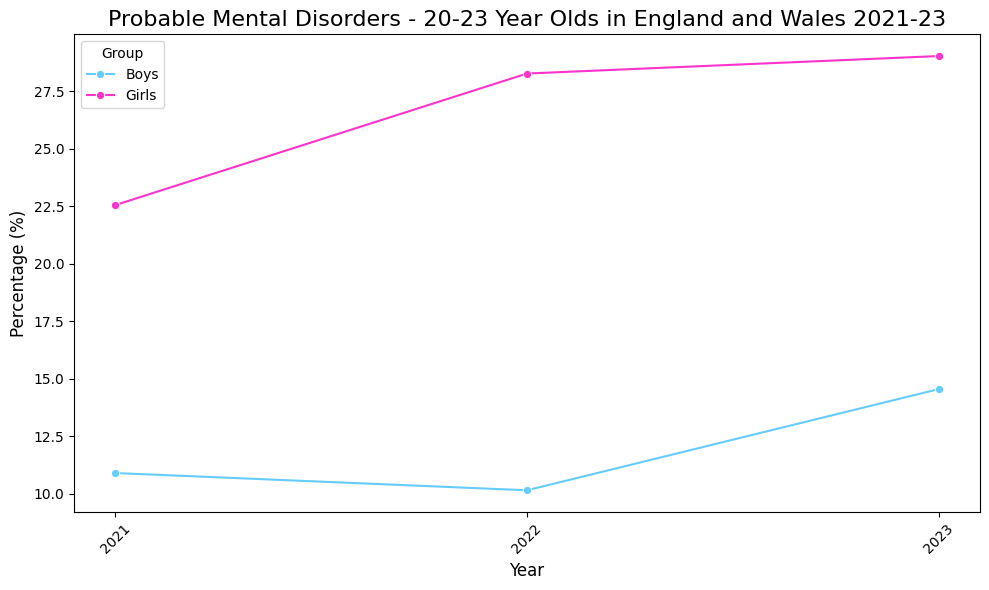

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Year': ['2021', '2022', '2023'],
    'Boys/Young Men': [10.9, 10.15, 14.55], 
    'Girls/Young Women': [22.55, 28.27, 29.03]  
}

# Create a DataFrame 
df_plot = pd.DataFrame(data)

# Plotting line graph
plt.figure(figsize=(10, 6))
custom_palette = ['#66ccff', '#ff80df']  # Blue for Boys, Pink for Girls
sns.lineplot(data=df_plot, x='Year', y='Boys/Young Men', label='Boys', marker='o', color='#66ccff')
sns.lineplot(data=df_plot, x='Year', y='Girls/Young Women', label='Girls', marker='o', color='#ff33cc')

# Customise
plt.title('Probable Mental Disorders - 20-23 Year Olds in England and Wales 2021-23', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Group')

plt.tight_layout()
plt.show()

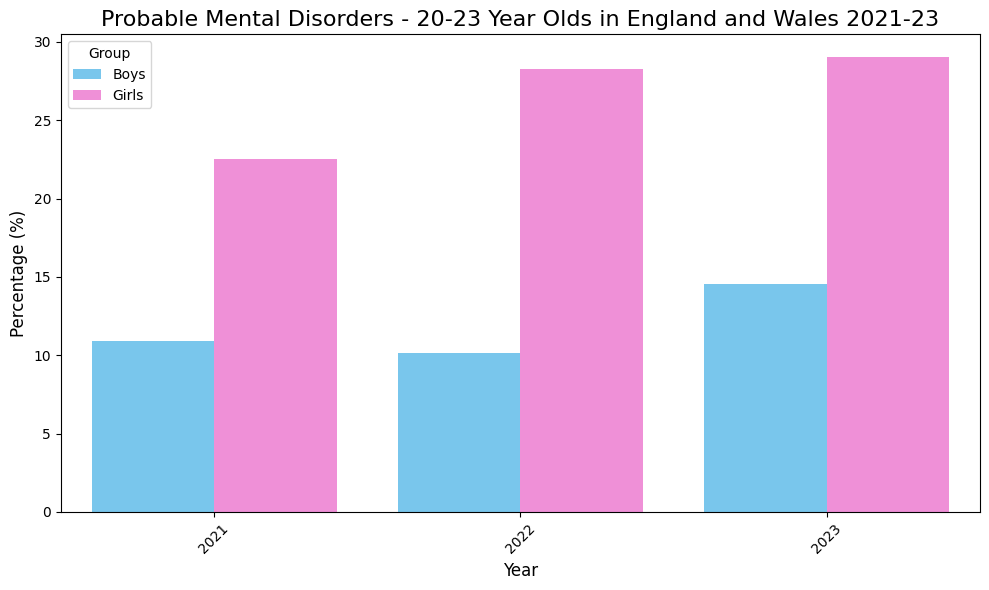

In [13]:
df_plot = pd.DataFrame(data)

# Reshape the data to long format (for easier plotting)
df_plot_long = df_plot.melt(id_vars='Year', var_name='Group', value_name='Percentage')

# Plotting as a bar chart
plt.figure(figsize=(10, 6))
custom_palette = ['#66ccff', '#ff80df']  # Blue for Boys, Pink for Girls
sns.barplot(data=df_plot_long, x='Year', y='Percentage', hue='Group', palette=custom_palette, hue_order=['Boys/Young Men', 'Girls/Young Women'])

# Customise
plt.title('Probable Mental Disorders - 20-23 Year Olds in England and Wales 2021-23', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=[handles[0], handles[1]], labels=['Boys', 'Girls'], title='Group', loc='upper left')
plt.tight_layout()
plt.show()